In [1]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df_games = pd.read_csv(r'C:\Users\misha\Pet-project\Parsing\games_dataset_gpt_12_02.csv',lineterminator = '\n')
df_movies = pd.read_csv(r'C:\Users\misha\Pet-project\Parsing\movies_dataset.csv',lineterminator = '\n')
df_games['date'] = pd.to_datetime(df_games['date'], format='%B %d, %Y', errors='coerce')
df_movies['date'] = pd.to_datetime(df_movies['date'], format='%B %d, %Y', errors='coerce')
df_movies

,title,score,date,summary\r,GPT_answer
0,Tokyo Story,100,1972-03-13,Yasujiro Ozu’s Tokyo Story follows an aging co...,/start/Atmosphere:\nTokyo Story is a Japanese ...
1,The Godfather,100,1972-03-24,Francis Ford Coppola's epic features Marlon Br...,/start/Atmosphere:\nThe Godfather is a classic...
2,Citizen Kane,100,1941-09-04,"Following the death of a publishing tycoon, ne...",/start/Atmosphere:\nCitizen Kane is a classic ...
3,Rear Window,100,1954-09-01,A wheelchair-bound photographer spies on his n...,/start/Atmosphere:\nRear Window is a classic A...
4,Casablanca,100,1943-01-23,"A Casablanca, Morocco casino owner in 1941 she...",/start/Atmosphere:\nCasablanca is a classic Am...
...,...,...,...,...,...
15295,Baby Geniuses,6,1999-03-12,Two doctors (Turner and Lloyd) set out to domi...,NaN
15296,National Lampoon's Gold Diggers,6,2004-09-17,National Lampoon breaks new comedic ground as ...,NaN
15297,The Human Centipede III (Final Sequence),5,2015-05-22,"Prison warden Bill Boss (Dieter Laser), leadin...",NaN
15298,Vulgar,5,2002-04-26,"The misadventures of Will, a struggling profes...",NaN


In [3]:
def stats_scores(df):
    #Наиболее часто встречающаяся велечина
    moda_statistics = stats.mode(df['score'])
    print('mode',moda_statistics[0])
    median = df['score'].median()#значение находящееся посередине упорядоченного множества
    mean = df['score'].mean()#среднее
    print(f'median is {median},mean is {mean}')
print('games:')
stats_scores(df_games)
print('movies:')
stats_scores(df_movies)

games:
mode [80]
median is 72.0,mean is 70.7691
movies:
mode [64]
median is 61.0,mean is 59.202222222222225


In [4]:
df_movies_last_10_years = df_movies.loc[df_movies['date'] > '2013-01-01']
df_games_last_10_years = df_games.loc[df_games['date'] > '2013-01-01']
print('games:')
stats_scores(df_games_last_10_years)
print('movies:')
stats_scores(df_movies_last_10_years)

games:
mode [80]
median is 74.0,mean is 72.2538784067086
movies:
mode [72]
median is 63.0,mean is 60.75736278447122


In [5]:
def con_interval(df):
    se_frame = stats.sem(df['score'])
    #Правило 2х и 3х сигм
    sigm2 = 1.96 * se_frame
    sigm3 = 2.58*se_frame
    mean = df['score'].mean()
    print(se_frame)
    print(f'С вероятностью 95% среднее оценка находится в области от {mean - sigm2} до {mean + sigm2}\n'
          f'С вероятностью 99% оценка находится в области от {mean - sigm3} до {mean + sigm3}')
con_interval(df_games)
con_interval(df_movies)

0.08582981764736464
С вероятностью 95% среднее оценка находится в области от 70.60087355741116 до 70.93732644258883
С вероятностью 99% оценка находится в области от 70.54765907046979 до 70.9905409295302
0.13778712249254396
С вероятностью 95% среднее оценка находится в области от 58.93215946213684 до 59.47228498230761
С вероятностью 99% оценка находится в области от 58.84673144619146 до 59.55771299825299


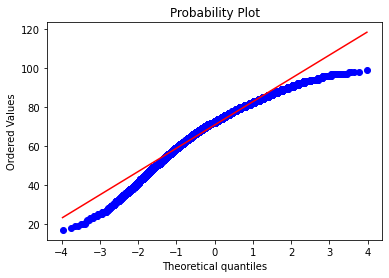

Распределение не норамальное так как 0.0 < 0.05


C:\Users\misha\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [6]:
import scipy.stats as stats
import pylab
def qq_plot(df):
    stats.probplot(df['score'], dist="norm", plot=pylab)
    pylab.show()
    st,pv = stats.shapiro(df['score'])
    if pv < 0.05:
        print(f'Распределение не норамальное так как {pv} < 0.05')
qq_plot(df_games)

<AxesSubplot:xlabel='score', ylabel='Count'>

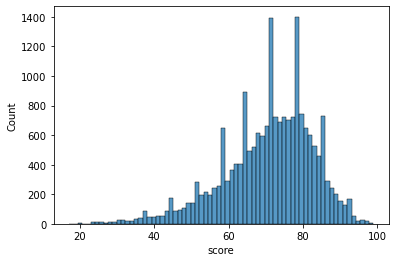

In [7]:
sns.histplot(df_games['score'])

<AxesSubplot:xlabel='score', ylabel='Count'>

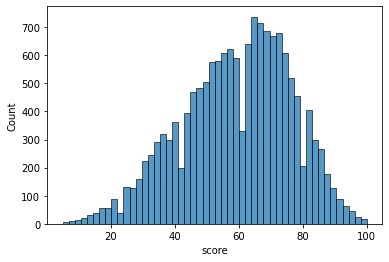

In [10]:
sns.histplot(df_movies['score'])

In [11]:
list_of_filtered_games = [df_games.loc[df_games['platform'] == i] for i in df_games['platform'].unique()]
list_of_filtered_games_scores = [i['score'] for i in list_of_filtered_games]

In [12]:
statistic, pvalue = stats.f_oneway(*list_of_filtered_games_scores)
if pvalue < 0.05/len(list_of_filtered_games_scores):
    print(f'Данных достаточно, чтобы отклонить H0(М1=М2=М3), так как {pvalue} < {0.05/len(list_of_filtered_games_scores)}')

Данных достаточно, чтобы отклонить H0(М1=М2=М3), так как 3.585770571675668e-107 < 0.002272727272727273


In [13]:
df_games_last_gen = df_games.loc[df_games['platform'].isin(['PC','PlayStation 5','Switch','Xbox Series X']) ]
from statsmodels.stats.multicomp import pairwise_tukeyhsd
p = pairwise_tukeyhsd(endog=df_games_last_gen["score"],groups=df_games_last_gen['platform'],alpha=0.05)
print(p)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------
           PC PlayStation 5   2.2173  0.002  0.6257  3.809   True
           PC        Switch   0.9033 0.0168  0.1164 1.6902   True
           PC Xbox Series X   3.5421    0.0  1.5979 5.4862   True
PlayStation 5        Switch   -1.314 0.1883 -3.0029 0.3748  False
PlayStation 5 Xbox Series X   1.3247 0.5067 -1.1273 3.7768  False
       Switch Xbox Series X   2.6388 0.0045  0.6143 4.6632   True
-----------------------------------------------------------------


In [14]:
list_of_movies_games_based = list(set(df_games['title'].unique()).intersection(df_movies['title'].unique()))
df_games_based = df_games[df_games['title'].isin(list_of_movies_games_based)]
df_movies_based = df_movies[df_movies['title'].isin(list_of_movies_games_based)]

,title,score,platform,date,summary,GPT_answer
110,Diablo,94,PC,1996-12-31,The kingdom of Khandaras has fallen into chaos...,/start/Atmosphere:\nDiablo is an action role-p...
200,Prince of Persia: The Sands of Time,92,Xbox,2003-11-12,Embark on a journey of scorched sands and anci...,NaN
209,Prince of Persia: The Sands of Time,92,PlayStation 2,2003-11-06,"Amidst the sands of ancient Persia, a young Pr...",NaN
257,Prince of Persia: The Sands of Time,92,GameCube,2003-11-18,Embark on a journey of scorched sands and anci...,NaN
328,Tomb Raider,91,PlayStation,1996-11-15,"Climb, swim, and backflip your way through a m...",NaN
...,...,...,...,...,...,...
19915,Ghostbusters,30,PlayStation 4,2016-07-12,Have you and your friends been experiencing pa...,NaN
19938,The Quiet Man,28,PlayStation 4,2018-11-01,The Quiet Man is an immersive story driven cin...,NaN
19941,Sneakers,28,Xbox,2002-10-22,Get ready for a fun adventure filled with cart...,NaN
19959,Charlie and the Chocolate Factory,26,PC,2005-07-12,Step inside the magical world of Willy Wonka's...,NaN


0.5530035936368217
С вероятностью 95% среднее оценка находится в области от 62.778951871942326 до 64.94672595899867
С вероятностью 99% оценка находится в области от 62.4360896438875 до 65.2895881870535
1.0011586978115772
С вероятностью 95% среднее оценка находится в области от 54.718792075212896 до 58.64333417063428
С вероятностью 99% оценка находится в области от 54.09807368256972 до 59.26405256327746


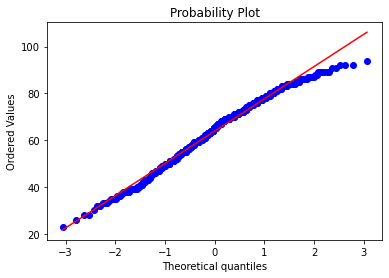

Распределение не норамальное так как 1.2684339708357584e-05 < 0.05


In [15]:
grouped_games = df_games_based.groupby(by='title').mean()
grouped_movies = df_movies_based.groupby(by='title').mean()
con_interval(df_games_based)
con_interval(df_movies_based)
qq_plot(df_games_based)

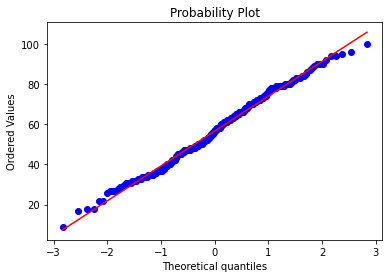

In [16]:
qq_plot(df_movies_based)

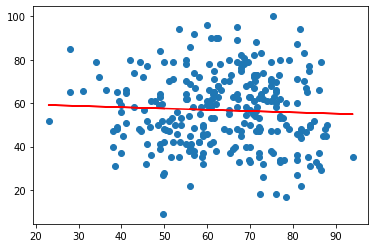

In [17]:
y1 = grouped_movies['score']
x = grouped_games['score']
b1 = y1.std()/x.std()*np.corrcoef(x, y1)[0][1]
b0 = y1.mean() - b1*x.mean()
f = lambda x: b0 + b1*x
y_pred = f(x)
plt.scatter(x, y1)
plt.plot(x, y_pred, color='r')
plt.show()

Nintendo 64


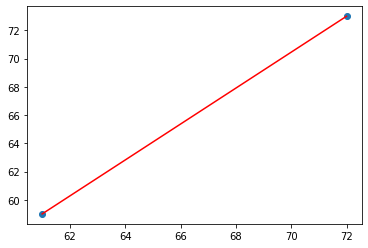

PlayStation


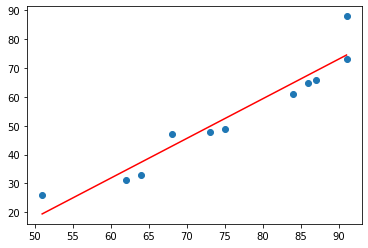

PlayStation 3


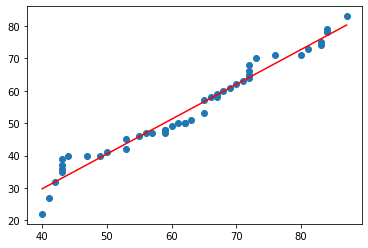

Dreamcast


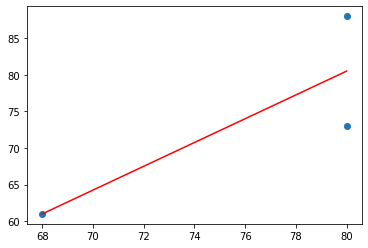

Xbox 360


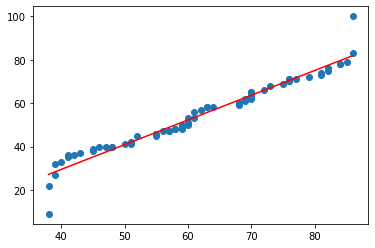

Wii


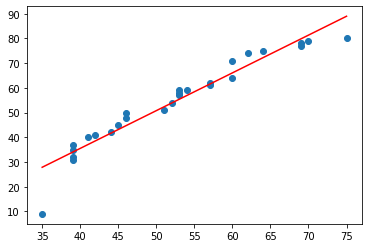

Xbox One


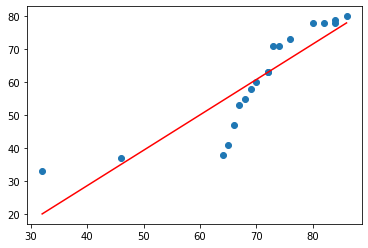

PC


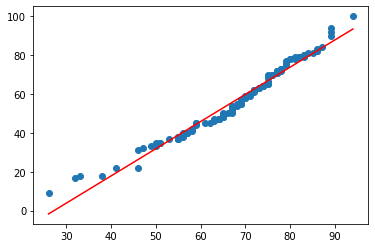

Switch


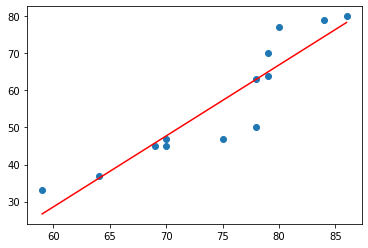

PlayStation 2


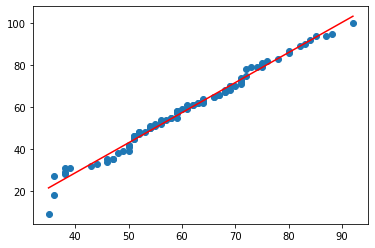

PlayStation 4


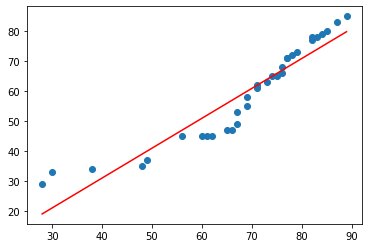

GameCube


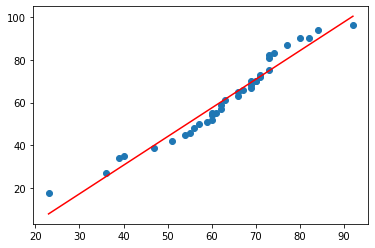

Xbox


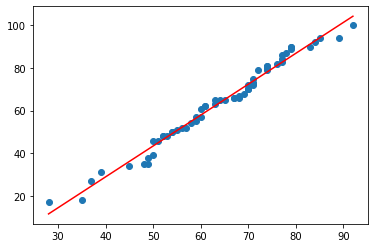

Wii U


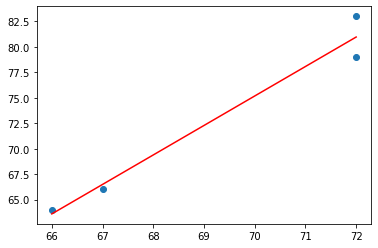

Xbox Series X


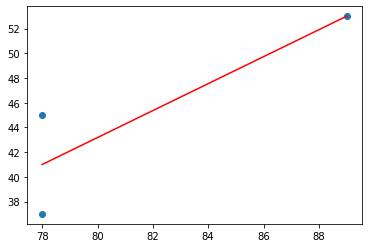

PlayStation 5


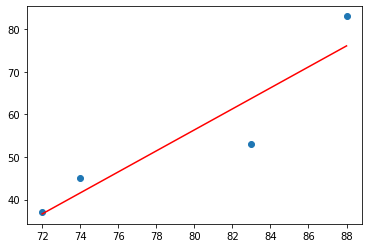

Game Boy Advance


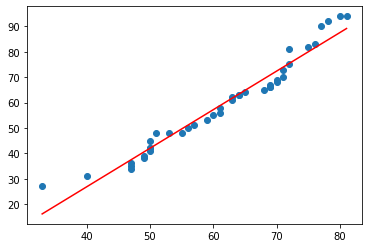

3DS


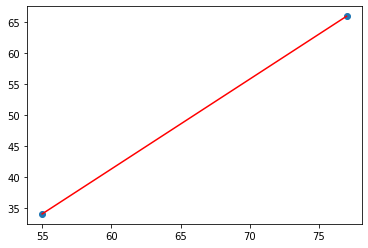

DS


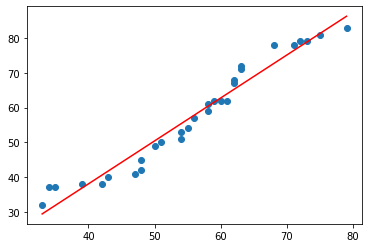

PlayStation Vita


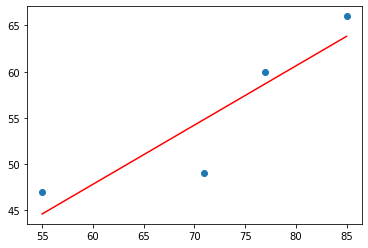

PSP


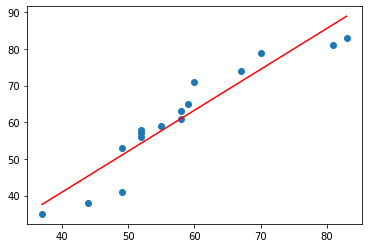

Stadia


C:\Users\misha\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\misha\anaconda3\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\Users\misha\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\misha\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\misha\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


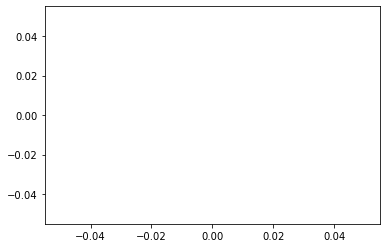

In [19]:
def dependencies():
    for i in df_games.platform.unique():
        print(i)
        df_games_pc = df_games.loc[df_games['platform'] == i]
        list_of_movies_games_based_pc = list(set(df_games_pc['title'].unique()).intersection(df_movies['title'].unique()))
        df_movies_based_pc = df_movies[df_movies['title'].isin(list_of_movies_games_based_pc)]
        y1 = df_movies_based_pc.drop_duplicates(subset=['title'], keep='first')['score']
        x = df_games_pc[df_games_pc['title'].isin(df_movies_based_pc['title'])]['score']
        b1 = y1.std() / x.std() * np.corrcoef(x, y1)[0][1]
        b0 = y1.mean() - b1 * x.mean()
        y_pred = b0 + b1 * x
        plt.scatter(x, y1)
        plt.plot(x, y_pred, color='r')
        plt.show()
dependencies()